# Choosing color palettes(调色板)

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize': (6, 6)})
np.random.seed(sum(map(ord, 'palettes')))

%matplotlib inline

## Building color palettes

The most important func for working with discrete color palettes is `color_palette()`. 这个函数提供了一个interface，让你可以在seaborn中有许多可能的方式generate colors，并且它可以在任何具有`palette` argument的函数内部使用（在某些情况下，当需要多种颜色时可用于`color` argument）。

`color_palette()` will accept the name of any seaborn palette or matplotlib colormap (except *jet*, which u should never use). It can also take a list of colors specified in any valid matplotlib format (RGB tuples, hex color codes, or HTML color names). The return value is always a list of RGB tuples.

Calling `color_palette()` with no arguments will return the current default color cycle.

In [5]:
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.6980392156862745),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

`set_palette()` takes the same arguments and will set the default color cycle for all plots.

**U can use `color_palette()` in a `with` statement to temporarily change the default palette.**

可以在`with`语句中使用`color_palette()`短暂地改变默认的palette。

当不知道数据的特征时，一般不知道什么样的color palette 或 colormap对于数据来说是最好的。

We'll break up the different ways to use `color_palette()` and other seaborn palette funcs by the three general kinds of color palettes:*qualitative(定性)*, *sequential(顺序)*, *diverging(发散)*.

## Quanlitative color palettes

Qualitative (or categorical) palettes are best when u want to distinguish discrete chunks of data that do not have inherent ordering.

定性（或分类）调色板最适合用于区分不具有固有排序的离散数据块。

当导入seaborn时，默认的color cycle被改为一组6种颜色，这会evoke标准的matplotlib color cycle。

In [7]:
current_palette = sns.color_palette()
current_palette

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.6980392156862745),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

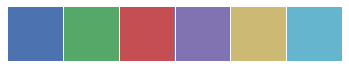

In [9]:
# Plot the values in a color palette as a horizontal array
sns.palplot(current_palette)

+ Available seaborn palette names:
        deep, muted(柔和的), bright, pastel, dark, colorblind
+ Other options:
        hsl, husl, any named matplotlib palette, list of colors

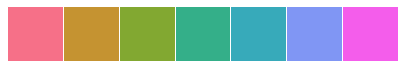

In [12]:
# Change the number of colors in the palette
sns.palplot(sns.color_palette("husl", n_colors=7))

Use a categorical matplotlib palette, add some desaturation(去饱和). (This can be good when making plots with large patches, which look best with dimmer colors).

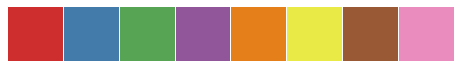

In [15]:
sns.palplot(sns.color_palette('Set1', n_colors=8, desat=.8))

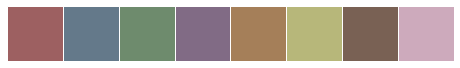

In [17]:
# desat: proportion to desaturate each color by
sns.palplot(sns.color_palette('Set1', n_colors=8, desat=.3))

### Using circular(圆形的，循环的) color systems

When u hace more than six categorical to distinguish, the easist thing is to draw evenly-spaced colors in a circular color space (such that the hue(色彩，色度) changes which keeping the brightness and saturation constant(使亮度和饱和度保持不变)). This is what most seaborn funcs default to when they need to use more colors than are currently set in the default color cycle.

The most common way to do this uses is the <span style="color:blue">hls</span> color space, which is a simple transformation of RGB values.

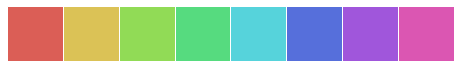

In [18]:
sns.palplot(sns.color_palette('hls', 8))

`hls_palette()` func lets u control the lightness and saturation of the colors.

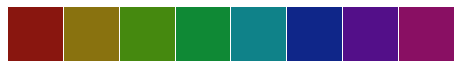

In [19]:
sns.palplot(sns.hls_palette(8, l=.3, s=.8))

 To remedy the problem (refer to documentation) of <span style="color:blue">hls</span>, <span style="color:blue">husl</span> system make it easy to select evenly spaced hues while keeping the apparent brightness and saturation much more uniform.

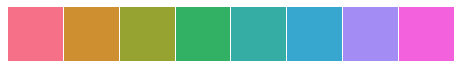

In [20]:
sns.palplot(sns.color_palette('husl', 8))

The is a similar func call `husl_palette()` that provides a more flexible interface to this system.

### Using categorical Color Brewer palettes

另一种视觉上令人愉悦的分类调色板(categorical palettes)来自于Color Brewer tool（它也有sequential and diverging palettes）。这些也存在于matplotlib，但没有得到正确的处理。在seaborn中，当要求一个qualitative Color Brewer palette，你总是会得到discrete colors，但这意味着在某一时刻它们将开始循环。

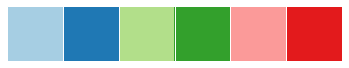

In [22]:
sns.palplot(sns.color_palette('Paired'))

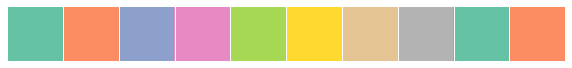

In [23]:
sns.palplot(sns.color_palette("Set2", 10))

`choose_colorbrewer_palette()`帮助从Color Brewer library中选择palettes。这个函数必须在IPython中使用，它将启动一个交互式的widget，让你可以浏览多种选项并调整参数。

你可能只想使用一组特别喜欢的colors。`color_palette()`接受一个颜色列表，所以很容易实现。

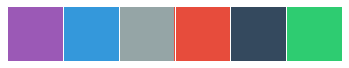

In [24]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(flatui))

### Using named colors from the xkcd color survry

<span style="color:blue">xkcd</span> ran a crowdsourced effort to name random RGB colors. This produced a set of 954 named colors, which you can now reference in seaborn using the <span style="color:blue">xkcd_rgb</span> dictionary:

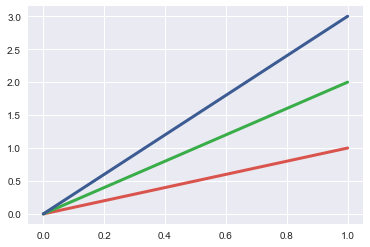

In [25]:
plt.plot([0, 1], [0, 1], sns.xkcd_rgb['pale red'], lw=3)
plt.plot([0, 1], [0, 2], sns.xkcd_rgb['medium green'], lw=3)
plt.plot([0, 1], [0, 3], sns.xkcd_rgb['denim blue'], lw=3)

In addition to pulling out single colors from the xkcd_rgb dictionary, you can also pass a list of names to the `xkcd_palette()` function.

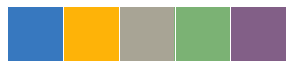

In [26]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors))